In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import math

import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

import vizualizacia_funkcie as visual

In [2]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

In [3]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "relationship", "occupation", "income", "workclass", 
                     "hours-per-week", "medical_info", "class"]

# Joinutie dataframov + merguntie viacerych zaznamov jedneho pacienta

In [4]:
print("Rozmer df1", df1.shape)
print("Rozmer df2", df2.shape)

print(len(df1["name"].unique()))
print(len(df1["address"].unique()))

print(len(df2["name"].unique()))
print(len(df2["address"].unique()))

Rozmer df1 (3933, 5)
Rozmer df2 (3983, 22)
3933
3933
3933
3933


Vidime, ze je rovnaky pocet unique values pre meno a adresu v obidvoch dataframoch. My totiz hladame najlepsi kluc, podla ktoreho by sme vedeli joinut obe dataframy dokopy. Sice maju rozdielne rozmery, ale minule, pri analyze, sme zistili, ze niektory pacienty maju pridelene 2 datarowy, kedy obe zaznamy su nie plne vyplnene - v zmysle, ze je mozne nasledne mergnut dane 2 zaznamy do jedneho, cim ziskavame jeden zaznam zo vsetkymi informaciami, ktore boli dostupne v tych dvoch zaznamoch.

In [5]:
key1 = sorted(list(df1["name"].unique() + " " + df1["address"].unique()))
key2 = sorted(list(df1["name"].unique() + " " + df1["address"].unique()))

key1

['Aaron Davis 379 Rodriguez Inlet\r\nFisherbury, MD 83114',
 'Aaron Dini 105 Medina Springs Suite 462\r\nEmilyland, KS 59124',
 'Aaron Gann 59685 Thomas Extension Apt. 142\r\nFieldsborough, UT 17996',
 'Aaron Gregg 10883 Williams Locks Suite 821\r\nEast Carmen, ME 31095',
 'Aaron Lindley 564 Stevenson Park Apt. 839\r\nRodriguezville, AR 73176',
 'Aaron Manning 9503 Christy Meadow\r\nAntoniostad, DC 31369',
 'Aaron Moody 5443 Kurt Estate\r\nHillbury, MS 07587',
 'Aaron Noman PSC 0351, Box 8841\r\nAPO AA 86063',
 'Aaron Robinson 16767 Medina Manor Suite 889\r\nCarlosshire, MD 96418',
 'Aaron Rogers 3257 Jones Center Apt. 917\r\nSeanland, OH 20838',
 'Aaron Spriggs 0988 Jeffrey Shoal Apt. 378\r\nMelissatown, DE 53705',
 'Abel Love 40589 Brian Streets Apt. 190\r\nPort Lindseyfort, CO 71854',
 'Abraham Hefty 21291 Beard Place\r\nSarahshire, TX 38497',
 'Abraham Winkles 78263 Jennifer Road\r\nWilliamsmouth, ME 37642',
 'Adalberto Daughters Unit 7931 Box 0601\r\nDPO AE 50505',
 'Adam Baskervi

In [6]:
key1 == key2

True

Vidime, ze oba dataframy zdielaju rovnake informacie o pacientovi, konkretne o jeho mene a adrese. Tak mozeme tieto dva dataframy joinut na zaklade mena, pricom vymazeme prvotne adresu z jedneho dataframu

In [7]:
data = df1.drop(columns=["address"]).set_index("name").join(df2.set_index("name"), how="right").reset_index()
data

,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Aaron Davis,56,Female,1962-12-27,"379 Rodriguez Inlet\r\nFisherbury, MD 83114",White,Divorced,Other-service,f,3.0,...,5th-6th,199298.0,0.0,41.806596,<=50K,"{'mean_oxygen':'1.647157191','std_oxygen':'14....",?,45.0,0.0,Local-gov
1,Aaron Dini,50,Male,1969-05-22,"105 Medina Springs Suite 462\r\nEmilyland, KS ...",White,Divorced,Sales,f,10.0,...,Some-college,120939.0,0.0,53.615229,<=50K,"{'mean_oxygen':'1.380434783','std_oxygen':'15....",United-States,40.0,0.0,Self-emp-not-inc
2,Aaron Gann,25,Male,1994-07-26,59685 Thomas Extension Apt. 142\r\nFieldsborou...,Black,Never-married,?,f,4.0,...,7th-8th,107112.0,0.0,50.476073,<=50K,"{'mean_oxygen':'78.30183946','std_oxygen':'79....",United-States,30.0,0.0,?
3,Aaron Gregg,42,Female,1977-04-16,"10883 Williams Locks Suite 821\r\nEast Carmen,...",Black,Widowed,Transport-moving,f,9.0,...,HS-grad,157942.0,0.0,35.976649,<=50K,"{'mean_oxygen':'1.489130435','std_oxygen':'10....",United-States,40.0,0.0,Local-gov
4,Aaron Lindley,-4900,Female,1969-12-11 00:00:00,"564 Stevenson Park Apt. 839\r\nRodriguezville,...",White,Never-married,Sales,F,9.0,...,HS-grad,156084.0,0.0,54.280153,<=50K,"{'mean_oxygen':'1.194816054','std_oxygen':'11....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Young Provines,51,Male,1968-05-19,"7993 Sharon Roads Suite 311\r\nPort Daniel, GA...",White,Married-civ-spouse,Exec_managerial,FALSE,11.0,...,Assoc-voc,83444.0,1.0,44.303479,>50K,"{'mean_oxygen':'3.16722408','std_oxygen':'22.3...",United-States,43.0,0.0,Private
3979,Zachary Grandfield,-5800,Male,1960/12/18,"77606 Maxwell Rest Apt. 485\r\nPort Jennifer, ...",Black,Married-civ-spouse,Transport-moving,f,10.0,...,Some-college,343849.0,1.0,29.456767,<=50K,"{'mean_oxygen':'2.994147157','std_oxygen':'21....",United-States,40.0,0.0,Private
3980,Zachary Miller,46,Male,1973-08-07,"96654 Marc Stream\r\nEast Cassandra, VT 84597",White,Married-civ-spouse,Adm-clerical,f,13.0,...,Bachelors,162327.0,0.0,43.191434,>50K,"{'mean_oxygen':'1.62541806','std_oxygen':'14.0...",?,50.0,1902.0,Private
3981,Zachary Seltzer,64,Female,1955-06-08 00 00 00,"38371 Crystal Stravenue\r\nPerkinsmouth, DE 20764",White,Divorced,Sales,f,7.0,...,11th,444089.0,1.0,34.132553,<=50K,"{'mean_oxygen':'66.53260870000001','std_oxygen...",United-States,40.0,0.0,Private


Podme sa teraz pozriet na problem mergovania dat dvoch zaznamov jedneho pacienta do jedneho datarowu. Ako priklad sme si zobrali cloveka, ktory ma 2 zaznamy v nasom datasete, pricom ako mozno vidiet, existuje zopar atributov, ktore su u jedneho zaznamu nullove, zatial co u druheho nie su. Prikladom je napriklad relationship.

In [8]:
daniel = data.loc[data["name"] == "Daniel Martin"]
print(daniel.iloc[0].isnull() ^ daniel.iloc[1].isnull())

daniel["relationship"]

name                False
age                 False
sex                 False
date_of_birth       False
address             False
race                False
marital-status      False
occupation          False
pregnant            False
education-num       False
relationship         True
skewness_glucose    False
mean_glucose         True
capital-gain        False
kurtosis_glucose    False
education           False
fnlwgt               True
class               False
std_glucose         False
income              False
medical_info         True
native-country      False
hours-per-week       True
capital-loss        False
workclass            True
dtype: bool


678     Husband
679         NaN
Name: relationship, dtype: object

Taktiez, niekto by mohol argumentovat, ze su to 2 rozlicne medicinske zaznamy daneho pacienta, a nie jedneho, no toto sme uz minule vyvratili, staci sa pozriet na namerane hodnoty cloveku

In [9]:
daniel2 = daniel.dropna(axis=1)

daniel2.iloc[0] == daniel2.iloc[1]

name                True
age                 True
sex                 True
date_of_birth       True
address             True
race                True
marital-status      True
occupation          True
pregnant            True
education-num       True
skewness_glucose    True
capital-gain        True
kurtosis_glucose    True
education           True
class               True
std_glucose         True
income              True
native-country      True
capital-loss        True
dtype: bool

In [10]:
daniel2

,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,education-num,skewness_glucose,capital-gain,kurtosis_glucose,education,class,std_glucose,income,native-country,capital-loss
678,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,14.0,-0.575827,0.0,-0.065923,Masters,0.0,55.072854,>50K,United-States,1887.0
679,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,14.0,-0.575827,0.0,-0.065923,Masters,0.0,55.072854,>50K,United-States,1887.0


Ako mozno vidiet, ide o rovnake medicinske zaznamy, staci sa pozriet na merania glukozy, ktore su "nachlp" presne

In [11]:
def piece_datarows_together(data):
    
    data = data.copy().set_index("name")
    
    #toto nam vrati dataset, ktory obsahuje vsetky duplikaty, s ktorymi budeme pracovat
    duplicated = data[data.index.duplicated(keep=False)]
    
    index_values = duplicated.index.unique()
    
    #najprv vsetky hodnoty prenesieme do prveho vyskytu zaznamu daneho pacienta v datasete
    for idx in index_values:
        mini_dataset = duplicated.loc[idx]
        
        missing_mask = mini_dataset.iloc[0].isnull()
        attributes = mini_dataset.columns.values
        missing_attributes = attributes[missing_mask]
        
        for attr in missing_attributes:
            mini_dataset.iloc[0][attr] = mini_dataset[attr].notnull().values[0]
        
        
    #teraz uz mozme vymazat vsetky druhe, resp. ostatne zaznamy pacienta
    duplicated_mask = data.index.duplicated(keep="first")
    
    data = data.reset_index()
    duplicated_indices = data.index.values[duplicated_mask]
    
    return data.drop(index=duplicated_indices).reset_index()


In [12]:
data = piece_datarows_together(data)

<ipython-input-11-9333c2aa2134>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dataset.iloc[0][attr] = mini_dataset[attr].notnull().values[0]


In [13]:
print(data["name"].value_counts())
data.loc[data["name"] == "Daniel Martin"]

Todd Salles       1
James Tenney      1
Todd Flanagan     1
Joshua Thomas     1
Caleb Johnson     1
                 ..
Wallace Street    1
Shawn Replogle    1
Matt Morgan       1
Craig Holthaus    1
John Emily        1
Name: name, Length: 3933, dtype: int64


,index,name,age,sex,date_of_birth,address,race,marital-status,occupation,pregnant,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
675,678,Daniel Martin,55,Male,1964-02-02,"1600 Shaun Drive Apt. 113\r\nEast Jacobmouth, ...",White,Married-civ-spouse,Prof-specialty,f,...,Masters,146659.0,0.0,55.072854,>50K,"{'mean_oxygen':'2.369565217','std_oxygen':'14....",United-States,NaN,1887.0,NaN


# Odstranenie useless atributov

Teraz, co sme uz joinli obidva dataframy a mergli datarowy, ktore boli z nejakeho dovodu rozdelene, sa mozeme pozriet na samotne atributy a spracovat ich.

V prvom rade vsak vyhodime atributy, ktore su uplne useless. Medzi nimi patri: 
- capital-gain 
- capital-loss

Dovodom, preco tieto mazeme, je ze 90% vsetkych ich hodnot su same 0.

Potom medzi dalsimi kandidatmi, ktore mozme hned vymazat budu:
- name
- date_of_birth - zatial ho nebudeme mazat, pouzijeme na imputaciu agu
- address - z tadialto chceme este precitat napriklad stat, v ktorom sa to robilo (najma sa teraz bavime o USA a ich statoch)
- fnlwgt - kedze nenasiel som ziadnu korelaciu medzi tymto vztahom a inymi ciselnymi hodnotami, ako aj nema korelaciu so samotnym prediction - class
- pregnant - je velmi malo tehotnych ludi necele 2%

In [14]:
data = data.drop(columns=["capital-gain", "capital-loss", "name", "fnlwgt", "pregnant"])

data.columns

Index(['index', 'age', 'sex', 'date_of_birth', 'address', 'race',
       'marital-status', 'occupation', 'education-num', 'relationship',
       'skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'education',
       'class', 'std_glucose', 'income', 'medical_info', 'native-country',
       'hours-per-week', 'workclass'],
      dtype='object')

Este stale mame dost atributov, ktore nemusia mat so predikciou cukrovky ziadnu suvislost. Ale vacsina tychto atributov sa najlepsie urci, ci su potrebne alebo nie, na zaklade samotneho trenovania modelu s a bez danych parametrov. 

Este, v priebehu tohto 2. zadania, sa pokusime najst nejake atributy, ktore nemaju vypovednu hodnotu, napriklad pomocou VarianceThreshold, ale teraz v datasete mame velke mnozstvo kategorickych hodnot, ako aj mnozstvo zle zformatovanych udajov, a tak skontrolovanie variancie jednotlivych atributov vykoname neskorsie, ked ich trosku spracujeme... Teraz sa budeme venovat jednotlivym atributom a ich spravovaniu. 

Nakoniec, ked budeme mat vykonane vsetky upravy nad atributmi, tak to vsetko spojime dokopy pouzivajuc triedy v scikit kniznici, ako napriklad Pipeline, ColumnTransform a pod.

# Preprocessing jednotlivych atributov

In [15]:
def identify_outliers(a):
    q25 = a.quantile(0.25)
    q75 = a.quantile(0.75)
    
    iqr = q75-q25
        
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    
    return a[(a > upper) | (a < lower)]

Zbavime sa whitespacov vo vacsine stringovych atributoch...

In [16]:
data.columns

Index(['index', 'age', 'sex', 'date_of_birth', 'address', 'race',
       'marital-status', 'occupation', 'education-num', 'relationship',
       'skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'education',
       'class', 'std_glucose', 'income', 'medical_info', 'native-country',
       'hours-per-week', 'workclass'],
      dtype='object')

In [17]:
def string_formatting(col):
    
    if col.dtype == "O":
        col = col.apply(lambda row: row.strip() if row is not np.nan else row)
        col = col.apply(lambda row: np.nan if row is not np.nan and row == "?" else row)
    
    return col

data = data.apply(string_formatting)

### marital-status a relationship

Married-civ-spouse       1845
Never-married            1237
Divorced                  546
Separated                 139
Widowed                   115
Married-spouse-absent      41
Married-AF-spouse           3
Name: marital-status, dtype: int64


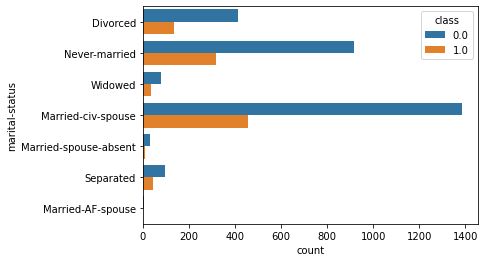

In [18]:
visual.univariate_categ_to_class(data, "marital-status")

Zbavime sa malo pocetnych kategorii a skombinujeme ich vsetky do kategorie "Other"

In [19]:
def marital_status_categories(row):
    
    ms = row["marital-status"]
        
    if ms is not np.nan and ms not in ("Divorced", "Never-married", "Married-civ-spouse"):
        row["marital-status"] = "Other"
        
    return row

In [20]:
data = data.apply(marital_status_categories, axis=1)

Na imputovanie missing values planujem pouzit atribut **relationship**, tak najprv na ten sa taktiez musime pozriet, a jemu znizit pocet kategorii, az potom budeme moct vyberat sposoby, ako imputovat missing values.

Husband           1622
Not-in-family      966
Own-child          602
Unmarried          425
Wife               193
Other-relative     117
Name: relationship, dtype: int64


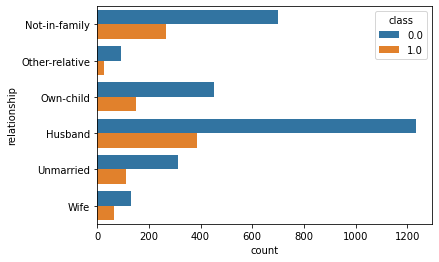

In [21]:
visual.univariate_categ_to_class(data, "relationship")

Znova mozme malopocetne kategorie spojit dokopy a nasledne vykoname bivariate analyzu medzi tymto atributom a marital-status, aby sme urcili, ci sme vybrali vhodny styl kategorizacie.

In [22]:
def relationship_categories(row):
    
    rel = row["relationship"]
        
    if rel is not np.nan and rel not in ("Not-in-family", "Husband", "Own-child"):
        row["relationship"] = "Other"
        
    return row

In [23]:
data = data.apply(relationship_categories, axis=1)

In [24]:
data[["relationship", "marital-status"]].isnull().sum()

relationship      8
marital-status    7
dtype: int64

Teraz sa sustredime na missing values

In [25]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn import impute 
from sklearn import preprocessing
import category_encoders as ce

In [26]:
def categ_impute_iterativeImputer(data, columns, initial_strategy="most_frequent", 
                                  max_iter=20, join=True):

    data = data.copy()
    
    X = data[columns]
    

    null_values = pd.DataFrame(index=pd.Index([-1]), columns=columns, data=[[np.nan for i in range(len(columns))]])
    X = pd.concat([null_values,X])

    encoder = ce.ordinal.OrdinalEncoder(handle_missing="return_nan", handle_unknown="return_nan")
    X = encoder.fit_transform(X)
    
    X = X[1:]

    iterative_impute = impute.IterativeImputer(max_iter=20, random_state=42, initial_strategy="most_frequent", 
                                              min_value=X.min(), max_value=X.max())


    try:
        X = iterative_impute.fit_transform(X).round()
    except (ValueError, np.linalg.LinAlgError):
        print("Jeden error bol trapnuty, kedy funkcii vadili NaNs. Tento error je ale divny, lebo mu to vadi", \
              "len prvy krat, a potom to uz ide...")
        X = iterative_impute.fit_transform(X).round()
    
    X = pd.DataFrame(data=X, columns=columns)    
    
    if join:
        
        X = encoder.inverse_transform(X)
        data[columns] = X
        return data
        
    else:
        return encoder.inverse_transform(X)



Potom mozno najedme dalsie pomocne atributy, ktore nam lepsie pomozu pri estimacii missing values...

In [27]:
#tento prikaz je zaujimavy v tom, ze prvykrat, ked sa callne, mu vadi NaN values, no druhykrat uz nie
data = categ_impute_iterativeImputer(data, ["relationship", "marital-status"])

Jeden error bol trapnuty, kedy funkcii vadili NaNs. Tento error je ale divny, lebo mu to vadi len prvy krat, a potom to uz ide...


Takto vyzeraju nase atributy uz so vsetkymi hodnotami

Husband          1625
Not-in-family     968
Other             735
Own-child         605
Name: relationship, dtype: int64


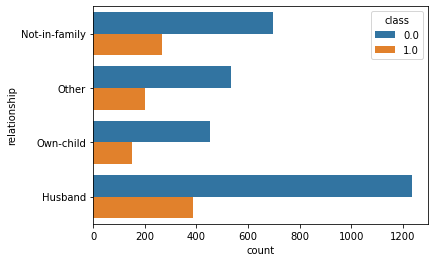

In [28]:
visual.univariate_categ_to_class(data, "relationship")

Married-civ-spouse    1846
Never-married         1238
Divorced               546
Other                  303
Name: marital-status, dtype: int64


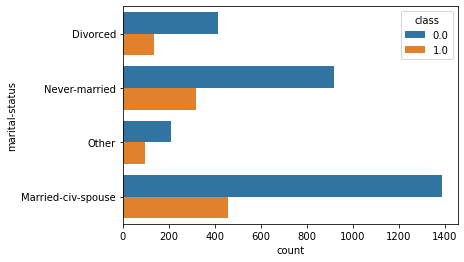

In [29]:
visual.univariate_categ_to_class(data, "marital-status")

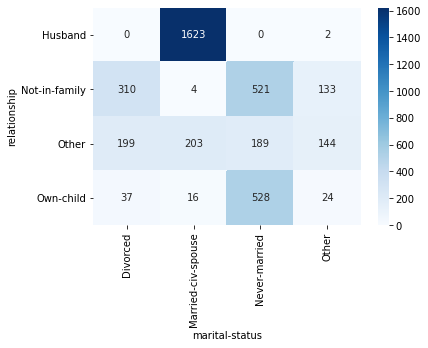

In [30]:
visual.bivar_2cats(data=data, x="marital-status", y="relationship")

### Skupina atributov: occupation, workclass, income, hours-per-week

In [31]:
attributes_marcel

['marital-status',
 'relationship',
 'occupation',
 'income',
 'workclass',
 'hours-per-week',
 'medical_info',
 'class']

Upraceme kategorie v tomto atribute. Vsetky mozne hodnoty boli zduplikovane, kedy v jednej variante sa pouzivali "-", zatial co v druhej "_"

In [32]:
data["occupation"] = data["occupation"].apply(lambda row: np.nan if row is not np.nan and row == "?" else row)
data["occupation"] = data["occupation"].apply(lambda row: row.strip().replace("_", "-") if row is not np.nan else row)

Craft-repair         522
Prof-specialty       494
Exec-managerial      481
Adm-clerical         472
Sales                431
Other-service        400
Machine-op-inspct    241
Transport-moving     196
Handlers-cleaners    162
Tech-support         106
Farming-fishing      104
Protective-serv       72
Priv-house-serv       12
Armed-Forces           1
Name: occupation, dtype: int64


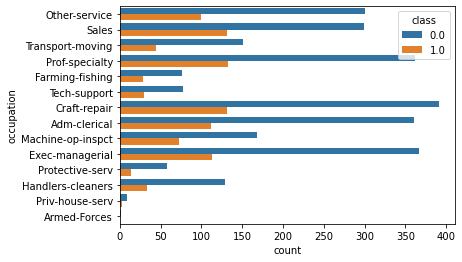

In [33]:
visual.univariate_categ_to_class(data, "occupation")

Malo pocetne hodnoty mozeme mergnut do jednej hodnoty, no ako sme minule vraveli, nemyslime si, ze tento atribut je extra vypovedny pre nasu klasifikacnu ulohu. Avsak mozme ho mierne spracovat a doplnit mu missing values, aby sme neskor v modeli mohli otestovat, ci nam pomaha pri klasifikacii alebo nie. Mergneme 6 najmenej poslednych kategorii do jendej.

In [34]:
def occupation_categories(row):

    occ = row["occupation"]
    
    if occ is not np.nan and occ not in ("Craft-repair", "Prof-specialty", "Exec-managerial", 
                                         "Adm-clerical", "Sales", "Other-service", "Machine-op-inspct", 
                                         "Transport-moving"):
        
        row["occupation"] = "Other"
        
    return row

In [35]:
data = data.apply(occupation_categories, axis=1)

Craft-repair         522
Prof-specialty       494
Exec-managerial      481
Adm-clerical         472
Other                457
Sales                431
Other-service        400
Machine-op-inspct    241
Transport-moving     196
Name: occupation, dtype: int64


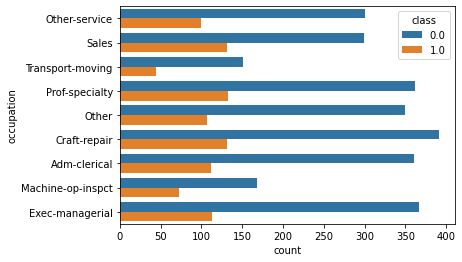

In [36]:
visual.univariate_categ_to_class(data, "occupation")

Private             2756
Self-emp-not-inc     289
Local-gov            253
State-gov            145
Self-emp-inc         131
Federal-gov          119
Never-worked           2
Without-pay            1
Name: workclass, dtype: int64


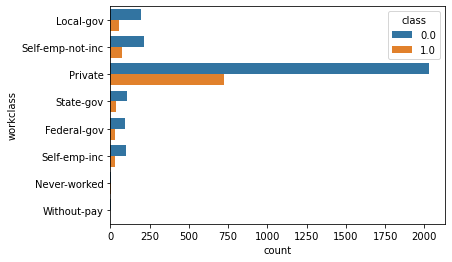

In [37]:
visual.univariate_categ_to_class(data, "workclass")

Tu mergneme vsetky kategorie, ktore nie su private...

In [38]:
def workclass_categories(row):

    wc = row["workclass"]
    
    if wc is not np.nan and wc != "Private":
        row["workclass"] = "Non-private"
        
    return row

In [39]:
data = data.apply(workclass_categories, axis=1)

Private        2756
Non-private     940
Name: workclass, dtype: int64


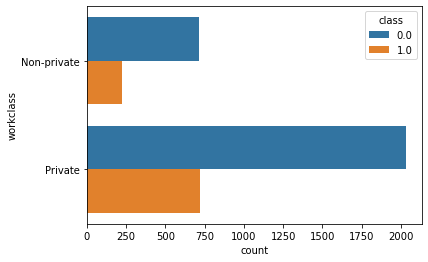

In [40]:
visual.univariate_categ_to_class(data, "workclass")

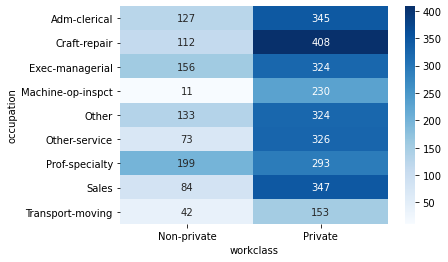

In [41]:
visual.bivar_2cats(data=data, x="workclass", y="occupation")

### Sem pridame aj education-num, lebo to je tiez celkom vhodny atribut do tejto kategorie...

In [42]:
data[["workclass", "occupation", "income", "hours-per-week"]].isnull().sum()

workclass         237
occupation        239
income              5
hours-per-week      9
dtype: int64

Ako mozno vidiet, je velke mnozstvo NaN hodnot, ktore potrebujeme vyriesit. Mohli by sme ich odstranit, najma pokial by sme nemali ine atributy, podla ktorych by sme mohli imputovat hodnoty, no kvoli tomu, ze je ich tolko vela na imputaciu, tak pouzijeme viacero atributov dokopy, ktore pouzijeme do IterativeImputer na doplnenie missing values.

Este predtym, nez vykoname spominanu imputaciu missing values, treba predspracovat ostatne atributy.

Atribut income netreba extra riesit, chybamu zopar hodnot, ale tie sa doplnia pri IterativeImputer

Korelacia medzi nasim atributom a y: -0.022582040803000948


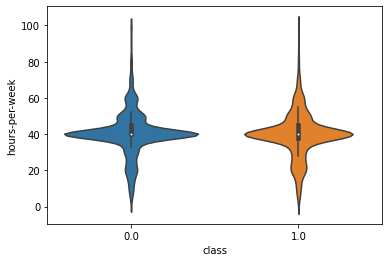

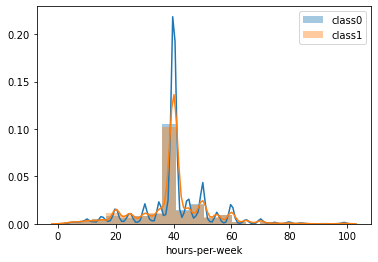

In [43]:
visual.univariate_num_to_class(data, "hours-per-week")

In [44]:
outliery = identify_outliers(data["hours-per-week"])

Je tu velke mnozstvo outlierov, ktore nemozeme len tak vymazat. Skusal som uz predtym aplikovat na tuto distribuciu viacero transformacii, ako PowerTransform alebo QuantileTransform, aby som transformoval spominane outliery, no bez uspechu. Dovodom, preco je tolko vela dat povazovanych za outlierov je, ze IQR je strasne maly. 

Rozhodol som sa, ze zkategorizujem tento atribut, cim vlastne aj mierne sa zbavim problemu outlierov.

In [45]:
print(data["hours-per-week"].quantile(0.25))
print(data["hours-per-week"].quantile(0.70))
print(data["hours-per-week"].quantile(0.75))

40.0
40.0
45.0


In [46]:
def categorize_hours(row):
    
    hour = row["hours-per-week"]
    
    if math.isnan(hour):
        row["hours-per-week-cat"] = math.nan
    elif hour <= 35:
        row["hours-per-week-cat"] = "<=35"
    elif hour <= 45:
        row["hours-per-week-cat"] = "35< hours <=45"
    elif hour > 45:
        row["hours-per-week-cat"] = ">45"        

    return row
        
data["hours-per-week-cat"] = 0
data = data.apply(categorize_hours, axis=1)

35< hours <=45    2260
<=35               839
>45                825
Name: hours-per-week-cat, dtype: int64


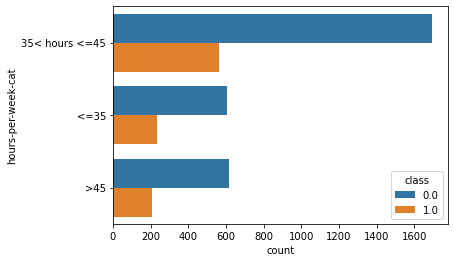

In [47]:
visual.univariate_categ_to_class(data, "hours-per-week-cat")

In [48]:
data = data.drop(columns=["hours-per-week"])
data = categ_impute_iterativeImputer(data, ["occupation", "workclass", "income", "hours-per-week-cat"], max_iter=20)

Jeden error bol trapnuty, kedy funkcii vadili NaNs. Tento error je ale divny, lebo mu to vadi len prvy krat, a potom to uz ide...


Podme sa teraz pozriet najma na atributy occupation a workclass, ktorym velkme mnozstvo hodnot chybalo

Other                677
Craft-repair         541
Prof-specialty       494
Exec-managerial      481
Adm-clerical         472
Sales                431
Other-service        400
Machine-op-inspct    241
Transport-moving     196
Name: occupation, dtype: int64


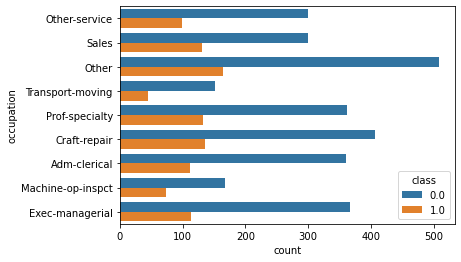

In [49]:
visual.univariate_categ_to_class(data, "occupation")

Private        2993
Non-private     940
Name: workclass, dtype: int64


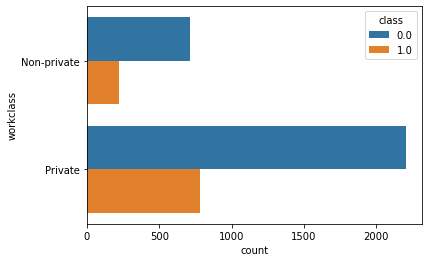

In [50]:
visual.univariate_categ_to_class(data, "workclass")

In [51]:
data[data["class"].isnull()]

,index,age,sex,date_of_birth,address,race,marital-status,occupation,education-num,relationship,...,mean_glucose,kurtosis_glucose,education,class,std_glucose,income,medical_info,native-country,workclass,hours-per-week-cat
439,440,62,Female,57-09-03,"961 Jesse Extensions\r\nThompsonville, DC 47389",Black,Never-married,Other-service,9.0,Other,...,149.421875,-0.299657,NaN,NaN,49.993220,<=50K,"{'mean_oxygen':'85.84280936','std_oxygen':'93....",United-States,Non-private,35< hours <=45
1428,1441,-3500,Male,1984-04-25,"974 Barnes Vista\r\nRichburgh, IA 08339",NaN,Never-married,Sales,13.0,Not-in-family,...,NaN,0.663868,Bachelors,NaN,45.005769,<=50K,"{'mean_oxygen':'2.58361204','std_oxygen':'19.4...",United-States,Non-private,35< hours <=45
1608,1622,39,Male,1980-02-22 00:00:00,"PSC 6528, Box 2421\r\nAPO AA 67256",NaN,Married-civ-spouse,Exec-managerial,13.0,Husband,...,111.0234375,0.122113,Bachelors,NaN,40.881969,<=50K,"{'mean_oxygen':'2.673076923','std_oxygen':'15....",Poland,Private,<=35
1754,1771,6300,Female,56-01-18,"82549 Michelle Plain\r\nPort Carl, GA 39389",White,Divorced,Other,10.0,Not-in-family,...,14.3359375,5.856152,Some-college,NaN,31.947290,<=50K,"{'mean_oxygen':'23.03093645','std_oxygen':'48....",United-States,Private,35< hours <=45
1864,1884,4700,Female,1971-11-12,"8413 James Branch Suite 359\r\nEast Hannah, DC...",White,Never-married,Other,NaN,Not-in-family,...,125.734375,0.026517,Bachelors,NaN,52.657722,<=50K,"{'mean_oxygen':'4.850334448','std_oxygen':'29....",United-States,Private,35< hours <=45
2283,2307,49,Male,1970-04-23,"4679 Castillo Fort Apt. 242\r\nCourtneytown, A...",White,Married-civ-spouse,Other,9.0,Husband,...,117.234375,0.639060,HS-grad,NaN,47.797667,<=50K,"{'mean_oxygen':'1.717391304','std_oxygen':'14....",United-States,Private,35< hours <=45
2399,2429,60,Female,1959-06-29,"545 Marshall Rapid\r\nEast Stephanieborough, M...",White,Never-married,Other,12.0,Not-in-family,...,114.78125,0.211148,Assoc-acdm,NaN,64.411632,<=50K,"{'mean_oxygen':'2.779264214','std_oxygen':'23....",United-States,Private,35< hours <=45
2500,2532,57,Male,1962-02-17,"646 Rachel Hollow Apt. 497\r\nStoutview, MN 15863",White,Never-married,Transport-moving,10.0,Own-child,...,131.1484375,-0.204942,Some-college,NaN,49.870001,<=50K,"{'mean_oxygen':'2.523411371','std_oxygen':'15....",United-States,Private,<=35
3159,3199,6900,Male,1950-10-09,"76441 Erin Trail\r\nWest Jared, WI 77001",White,Married-civ-spouse,Other,NaN,Husband,...,110.421875,0.396590,Doctorate,NaN,53.736715,>50K,"{'mean_oxygen':'3.421404682','std_oxygen':'22....",NaN,Non-private,>45


### medical_info 

Ako vieme uz z minulej casti, v tomto atribute su ulozene 4 atributy, ktore sa sustreduju na namerane hodnoty mnozstva kyslika v krvi pacientov.

Najprv budeme riesit outliery jednotlivych atributov, a potom spolu naraz im vyriesime missing values cez IterativeImputator

In [52]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [53]:
def get_oxygen_stats(row):
    
    string = row["medical_info"]
    
    if string is np.nan:
        return row
    
    string = string.replace("\'", "\"")
    di = json.loads(string)
    
    for k in di.keys():
        row[k] = float(di[k])
        
    return row

In [54]:
data = data.apply(get_oxygen_stats, axis=1)
data = data.drop(columns=["medical_info"])

#### mean_oxygen

count    3924.000000
mean       18.443141
std        34.723910
min         0.213211
25%         2.065217
50%         3.237040
75%        12.619983
max       217.371238
Name: mean_oxygen, dtype: float64
Skewness: 2.625728748203792
Kurtosis: 6.541974040571324


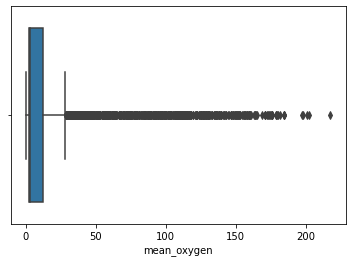

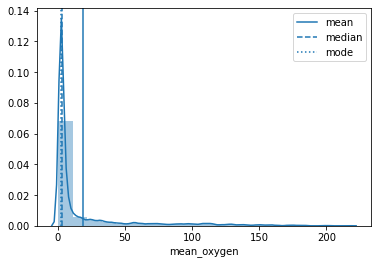

(695,)

In [55]:
visual.univariate_num(data, "mean_oxygen")
identify_outliers(data["mean_oxygen"]).shape

Korelacia medzi nasim atributom a y: 0.5172635777288903


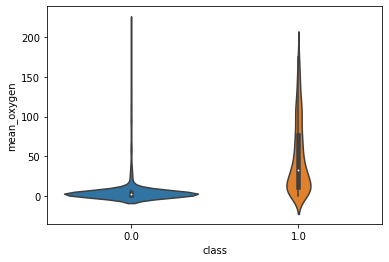

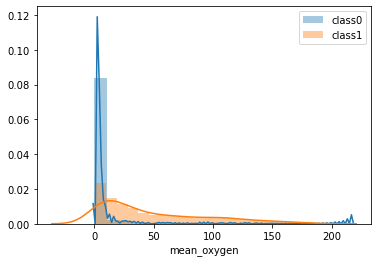

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


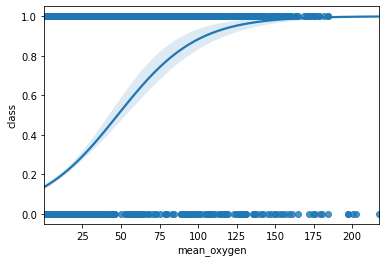

In [56]:
visual.univariate_num_to_class(data, "mean_oxygen")

Klucom pri spracovavani outlierov pri vacsine tychto medicinskych merani, je rozdelit si dany atribut podla target atributu. Ako mozno vidiet vyssie, tak vidime, ze dane distribucie hodnot tohto atributu podla hodnoty class su radikalne odlisne.

In [57]:
data_y0 = data[data["class"] == 0]["mean_oxygen"]
data_y1 = data[data["class"] == 1]["mean_oxygen"]

print("Pocet outlierov:", identify_outliers(data_y0).shape)
print("Pocet outlierov:", identify_outliers(data_y1).shape)

Pocet outlierov: (358,)
Pocet outlierov: (7,)


Uz len tymto rozdelenim hodnot do dvoch distribucii sme sa zbavili polovice outlierov. Keby sme to tak nespravili, tak velke mnozstvo cukrovkarov by bolo odstranenych, i ked oni sami, ked ich porovname k ostatnym cukrovkarom, nie su outliermi.

In [58]:
power = preprocessing.PowerTransformer()
new_data = power.fit_transform(data["mean_oxygen"].to_frame())

(0,)

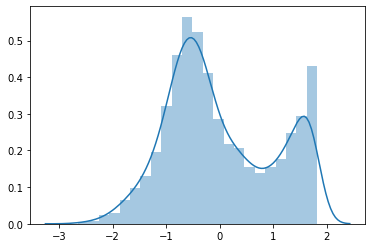

In [59]:
sns.distplot(new_data)
new_data = pd.Series(new_data.reshape(-1), name="data")
data["new_data"] = new_data

identify_outliers(new_data).shape

Korelacia medzi nasim atributom a y: 0.6424056166901284


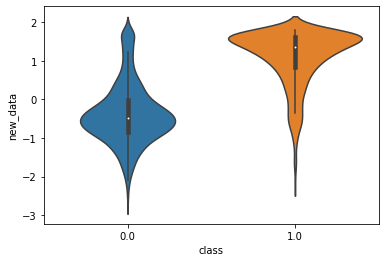

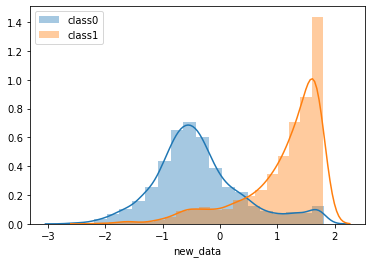

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


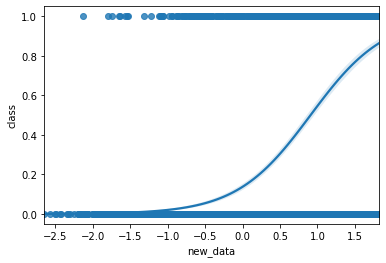

In [60]:
visual.univariate_num_to_class(data, "new_data")

Ako mozno vidiet, pokial by sme rovno na vsetky hodnoty **mean_oxygen** pouzili napriklad PowerTransform, tak sice by sme sa zbavili vsetkych outlierov, no taktiez by sme zahodili rozdielnost distribucii na zaklade hodnoty class.

Rozhodol som sa, ze odstranime outliery pri tomto atribute, co znamena, ze vacsina hodnot bude vymazana prave pre target triedu 0, co nam nevadi, lebo aj tak boli triedy nevyvazene.

In [61]:
idx = identify_outliers(data_y0).index.values
data = data.drop(index=idx)

idx = identify_outliers(data_y1).index.values
data = data.drop(index=idx)

Korelacia medzi nasim atributom a y: 0.6576775365977274


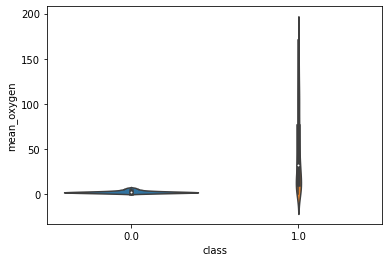

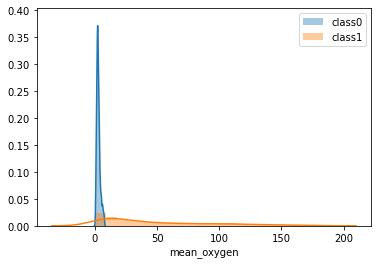

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


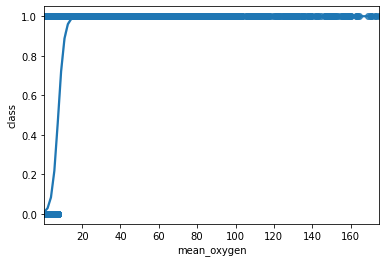

In [62]:
visual.univariate_num_to_class(data, "mean_oxygen")

Teraz mozme vyskusat znova pouzit PowerTransformer

In [63]:
power = preprocessing.StandardScaler()
new_data = power.fit_transform(data["mean_oxygen"].to_frame())

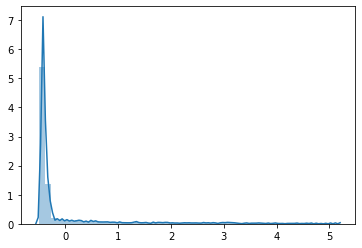

In [64]:
sns.distplot(new_data)

data["new_data"] = pd.Series(new_data.reshape(-1))

#### std_oxygen

Korelacia medzi nasim atributom a y: 0.8284349917810904


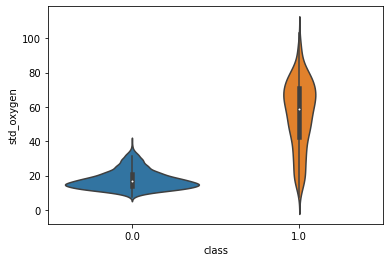

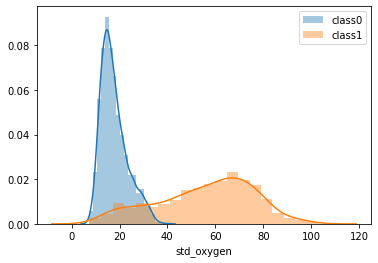

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


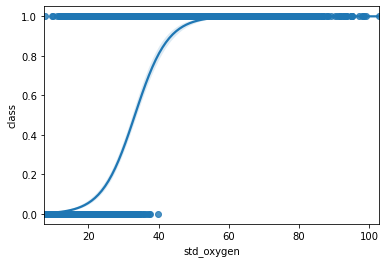

In [65]:
visual.univariate_num_to_class(data, "std_oxygen")

In [66]:
identify_outliers(data["std_oxygen"]).shape

(516,)

Znova to splitneme na 2 distribucie a pozrieme, kolko outlierov potom bude...

In [67]:
data_y0 = data[data["class"] == 0]["std_oxygen"]
data_y1 = data[data["class"] == 1]["std_oxygen"]

print("Pocet outlierov:", identify_outliers(data_y0).shape)
print("Pocet outlierov:", identify_outliers(data_y1).shape)

Pocet outlierov: (72,)
Pocet outlierov: (0,)


In [68]:
idx = identify_outliers(data_y0).index.values
data = data.drop(index=idx)

Korelacia medzi nasim atributom a y: 0.8351644671636412


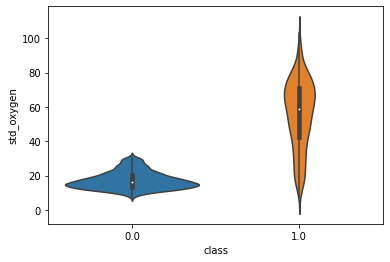

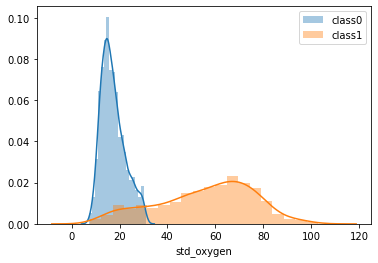

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


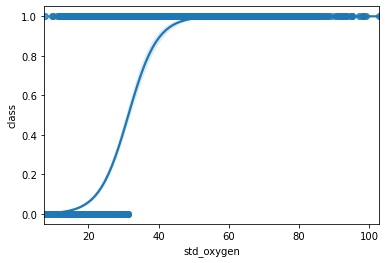

In [69]:
visual.univariate_num_to_class(data, "std_oxygen")

#### skewness_oxygen

Korelacia medzi nasim atributom a y: -0.47007384014059744


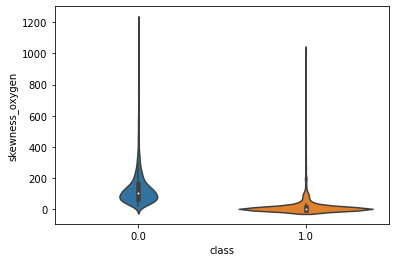

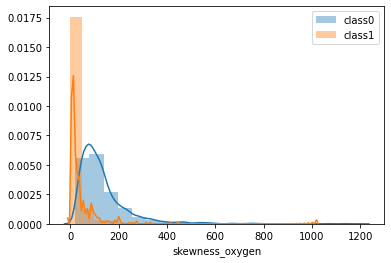

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


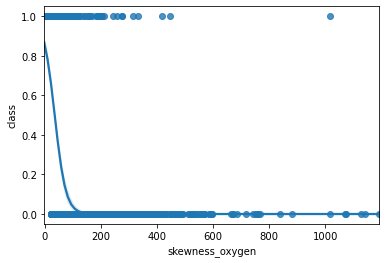

In [70]:
visual.univariate_num_to_class(data, "skewness_oxygen")

In [71]:
identify_outliers(data["skewness_oxygen"]).shape

(166,)

In [72]:
data_y0 = data[data["class"] == 0]["skewness_oxygen"]
data_y1 = data[data["class"] == 1]["skewness_oxygen"]

print("Pocet outlierov:", identify_outliers(data_y0).shape)
print("Pocet outlierov:", identify_outliers(data_y1).shape)

Pocet outlierov: (161,)
Pocet outlierov: (125,)


In [73]:
idx = identify_outliers(data_y0).index.values
data = data.drop(index=idx)

idx = identify_outliers(data_y1).index.values
data = data.drop(index=idx)

Korelacia medzi nasim atributom a y: -0.6772021564333919


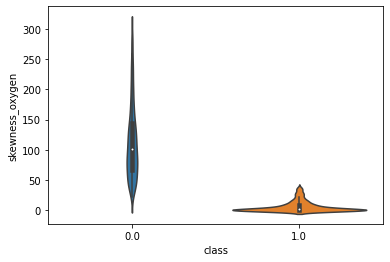

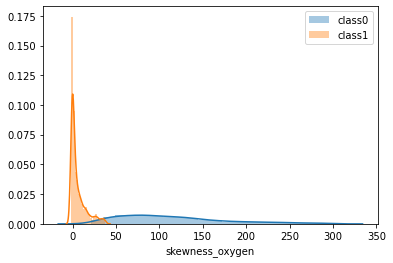

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


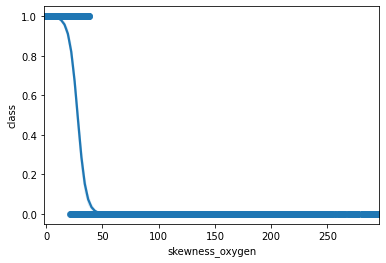

In [74]:
visual.univariate_num_to_class(data, "skewness_oxygen")

Najprv som chcel rovno transformovat tento atribut, aby som sa zbavil outlierov, no vyskusal som najprv vymazanie outierov v jednotlivych distribuciach podla hodnoty atributu class, cim som vyrazne zvysil korelaciu tohto atributu s target atributom.

#### kurtosis_oxygen

Korelacia medzi nasim atributom a y: -0.8307778215367214


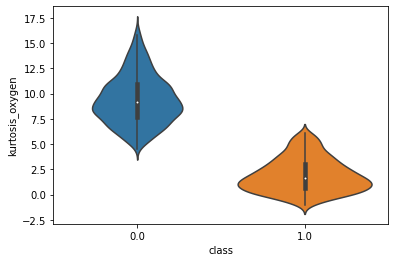

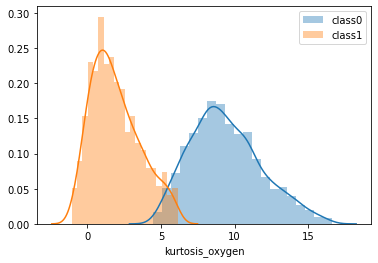

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


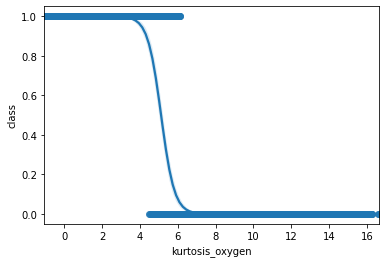

In [75]:
visual.univariate_num_to_class(data, "kurtosis_oxygen")

In [76]:
print("Pocet outlierov:", identify_outliers(data["kurtosis_oxygen"]).shape)

Pocet outlierov: (0,)


In [77]:
data_y0 = data[data["class"] == 0]["skewness_oxygen"]
data_y1 = data[data["class"] == 1]["skewness_oxygen"]

print("Pocet outlierov:", identify_outliers(data_y0).shape)
print("Pocet outlierov:", identify_outliers(data_y1).shape)

Pocet outlierov: (66,)
Pocet outlierov: (75,)


In [78]:
idx = identify_outliers(data_y0).index.values
data = data.drop(index=idx)

idx = identify_outliers(data_y1).index.values
data = data.drop(index=idx)

Korelacia medzi nasim atributom a y: -0.8544274492738746


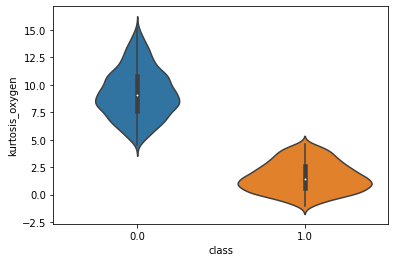

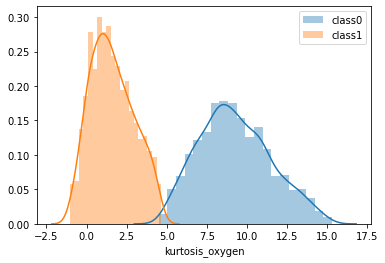

c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\users\marcel\appdata\local\programs\python\python38\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


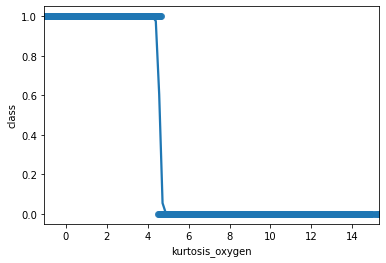

In [79]:
visual.univariate_num_to_class(data, "kurtosis_oxygen")

Teraz sa mozme sustredit na imputaciu missing values

In [80]:
data[["mean_oxygen", "std_oxygen", "skewness_oxygen", "kurtosis_oxygen"]].isnull().sum()

mean_oxygen        9
std_oxygen         9
skewness_oxygen    9
kurtosis_oxygen    9
dtype: int64

In [86]:
data[["mean_oxygen", "std_oxygen", "skewness_oxygen", "kurtosis_oxygen"]].isnull().all(axis=1).sum()

9

Sice vieme celkom dobre nahradit nejake chybajuce hodnoty atributov merani kyslika a glukozy na zaklade korelacie s inymi meraniami, vidime, ze prave 9 pacientov nema ziaden atribut o kysliku, inak povedane, maju atribut medical_info == NaN.

A toto by sme si uz moc trufali imputaciu atributov kyslika, pokial nemame ziadne hodnoty pre vsetky atributy kyslika. Tak ich iba jednoducho dropneme...

In [92]:
idx = data[data[["mean_oxygen", "std_oxygen", "skewness_oxygen", "kurtosis_oxygen"]].isnull().all(axis=1)].index.values
data = data.drop(index=idx)

Kedze my si chceme uchovat tvar, resp. doterajsiu diverzitu medzi distribuciami rovnakeho atributu na zaklade hodnoty class, tak my nepouzijeme ziadnu nelinearnu transformaciu, aby sme nasilu dostali normalnu distribuciu, lebo potom by sme "zabili" korelaciu medzi danym atributom a target atributom. 

Namiesto toho ich iba rescalujeme, konkretne pouzijeme StandardScaler

In [102]:
def standardize(data, columns):
    
    data = data.copy()
    X = data[columns]

    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    data[columns] = X
    
    return data

In [105]:
data = standardize(data, ["mean_oxygen", "std_oxygen", "skewness_oxygen", "kurtosis_oxygen"])

### class

Tomuto atributu chyba zopar hodnot, konkretne 9, a tak datam by sme neublizili, pokial by sme ich jednoducho dropli. Kludne by sme mohli aj imputovat dane hodnoty, mame dobre atributy so silnymi korelaciami s tymto atributom, a tak by sme sa hrali, ze vlastne uz robime danu klasifikacnu ulohu, ako keby, no tento atribut ma cisto obsahovat len ground truth, a tak, aby sme boli korektny, mali by sme missing value odstranit.

In [81]:
idx = data[data["class"].isnull()].index.values
data = data.drop(index=idx)

# TODO

- Kategoricke atributy -> Doteraz som len zmensoval pocet hodnot pri kategorickych atributoch + sme riesili imputovanie. Teraz vsak je potrebne encodovat ich bud do OrdinalEncoder alebo OneHotEncoder.
- Spojite atributy -> Bud v pripade "hours-per-week" sme dany atribut transformovali na kategoricky, alebo sme odstranovali outliery bud transformaciou alebo rovno odstranovanim zaznamov (zatial sme pouzivali len odstarnovanie zaznamov na odstranenie outlierov). Teraz je potrebne ich, v pripade, ze chceme zachovat distribuciu, len rescalovat - StandardScaler, alebo pokial nemusime zachovat distribuciu, tak rovno atribut namapujeme na gaussovku cez nelinearne transformacie - PowerTransforer / QuantileTransformer

Treba pouzivat OneHotEncoder pre nominal attributes a OrdinalEncoder pre ordinal attributes